# ***Smoker Identification - Through Machine and Deep Learning Techniques***

## Authors ~ Benjamin Brock , Ellie Manley
All rights reserved

## Project Origins:
This project was an exploratory analysis of the kaggle competition found here:
https://www.kaggle.com/competitions/playground-series-s3e24

We used a variety of appraoches to create a viable model, incorporating classic ML & DL models and assessing their efficacy.

### Techniques Applied:
**` Binary Classification `** , **` Linear Regression `** , **` Multivariate Logistic Regression `** , **` K - Nearest Neighbours`** , **` Random Forest Decision Tree Model `** , **` Feed Forward Neural Network `** , **` Gaussian Naive Beyes Regression `** .

<br />
<img align="centre" alt="Python" width="40px" style="padding-right:10px;" src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/python/python-plain.svg" />
<img align = "centre" alt="TF" width = "100px" style="padding-right:10px;" src="https://www.vectorlogo.zone/logos/tensorflow/tensorflow-ar21.svg"/>
<img align = "centre" alt="Pandas" width = "100px" style="padding-right:10px;" src="https://pandas.pydata.org/static/img/pandas.svg"/>
<img align = "centre" alt="SciKit" width = "100px" style="padding-right:10px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/390px-Scikit_learn_logo_small.svg.png?20180808062052"/>

<br />
  

## **Import Libraries**



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt
import os

## **Pull data directly from Kaggle using API key**

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'benjaminbrock'
os.environ['KAGGLE_KEY'] = 'a83338b8247b98c8774bf1464187615a'
!kaggle competitions download -c playground-series-s3e24

  0% 0.00/6.81M [00:00<?, ?B/s]
100% 6.81M/6.81M [00:00<00:00, 82.0MB/s]


### **Ensure directory is correctly established by Unzipping the compressed file(s)**

In [ ]:
!unzip /content/playground-series-s3e24.zip

Archive:  /content/playground-series-s3e24.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## **Read the `CSV` data and store it as a `Pandas Data Frame ` for manipulation.**

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
# Here we can view the top and bottom 5 rows from the Data Frame, note that within colab the print command isn't needed.
print(df.head)

<bound method NDFrame.head of             id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0            0   55         165          60       81.0             0.5   
1            1   70         165          65       89.0             0.6   
2            2   20         170          75       81.0             0.4   
3            3   35         180          95      105.0             1.5   
4            4   30         165          60       80.5             1.5   
...        ...  ...         ...         ...        ...             ...   
159251  159251   40         155          45       69.0             1.5   
159252  159252   50         155          75       82.0             1.0   
159253  159253   40         160          50       66.0             1.5   
159254  159254   50         165          75       92.0             1.2   
159255  159255   40         145          45       76.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  \
0  

## **Seperate the Labels from the data set**

In [ ]:
Labels = df.pop('smoking')
print (Labels)

0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64


In [ ]:
print(df.head)

<bound method NDFrame.head of             id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0            0   55         165          60       81.0             0.5   
1            1   70         165          65       89.0             0.6   
2            2   20         170          75       81.0             0.4   
3            3   35         180          95      105.0             1.5   
4            4   30         165          60       80.5             1.5   
...        ...  ...         ...         ...        ...             ...   
159251  159251   40         155          45       69.0             1.5   
159252  159252   50         155          75       82.0             1.0   
159253  159253   40         160          50       66.0             1.5   
159254  159254   50         165          75       92.0             1.2   
159255  159255   40         145          45       76.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  ...  \
0       

Remove unnecessary labels

In [ ]:
df.pop('id')
df.pop('Urine protein')

0         1
1         1
2         1
3         1
4         1
         ..
159251    1
159252    1
159253    1
159254    1
159255    1
Name: Urine protein, Length: 159256, dtype: int64

Scaling outliers back within the accepted range for LDL values.

In [ ]:
old_value = []
new_value = []

for i in df['LDL']:
    if i > 500:
        old_value.append(i)
        new_value.append(i/10)

df['LDL'] = df['LDL'].replace(old_value, new_value)

Create a normalized data set for use within the models

In [ ]:
def normalise(Data):
    Norm = MinMaxScaler(feature_range= (0,1))
    N_Data = Norm.fit_transform(np.array(Data))
    return N_Data

In [ ]:
NormData = normalise(df)

In [ ]:
print (NormData)

[[0.53846154 0.54545455 0.3        ... 0.00823893 0.02507523 0.        ]
 [0.76923077 0.54545455 0.35       ... 0.00755235 0.03510532 1.        ]
 [0.         0.63636364 0.45       ... 0.01029866 0.05115346 0.        ]
 ...
 [0.30769231 0.45454545 0.2        ... 0.00274631 0.01003009 0.        ]
 [0.46153846 0.54545455 0.45       ... 0.00549262 0.03510532 0.        ]
 [0.30769231 0.18181818 0.15       ... 0.00514933 0.01504514 0.        ]]


Create an 80:20 training : test split.

In [ ]:
from sklearn.model_selection import train_test_split
X_Train , X_Test, Y_Train , Y_Test = train_test_split( NormData , Labels, test_size = 0.2, random_state = 42)

In [ ]:
len(X_Train)

127404

In [ ]:
len(Y_Train)

127404

In [ ]:
len(Y_Test)

31852

Build the basic feed forward model

In [ ]:
model = Sequential()
model.add(Input(shape = 21))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dense(32, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_Train,Y_Train, epochs = 30 )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3982/3982 [==============================] - 6s 1ms/step - loss: 0.5351 - accuracy: 0.7119
Epoch 2/30
3982/3982 [==============================] - 4s 1ms/step - loss: 0.4889 - accuracy: 0.7480
Epoch 3/30
3982/3982 [==============================] - 5s 1ms/step - loss: 0.4828 - accuracy: 0.7516
Epoch 4/30
3982/3982 [==============================] - 4s 1ms/step - loss: 0.4804 - accuracy: 0.7535
Epoch 5/30
3982/3982 [==============================] - 5s 1ms/step - loss: 0.4796 - accuracy: 0.7537
Epoch 6/30
3982/3982 [==============================] - 4s 1ms/step - loss: 0.4791 - accuracy: 0.7541
Epoch 7/30
3982/3982 [==============================] - 4s 1ms/step - loss: 0.4784 - accuracy: 0.7541
Epoch 8/30
3982/3982 [==============================] - 5s 1ms/step - loss: 0.4783 - accuracy: 0.7547
Epoch 9/30
3982/3982 [==============================] - 4s 1ms/step - loss: 0.4780 - accuracy: 0.7548
Epoch 10/30
3982/3982 [==============================] - 5s 1ms/step - loss: 0.4772 - accurac

Next, we compare the neural network to the support vector classifier, linear regression, logistic regression, K nearest neighbours and the random forest classifier. Whilst this is far more than necessary - this activity served as an exploratory exercise.

In [ ]:
from sklearn.linear_model import LinearRegression , LogisticRegression

lr = LinearRegression()

from sklearn.svm import SVC

svc = SVC(kernel='rbf')

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=5)


              precision    recall  f1-score   support

  non-smoker       0.78      0.76      0.77     17783
      smoker       0.70      0.73      0.72     14069

    accuracy                           0.75     31852
   macro avg       0.74      0.74      0.74     31852
weighted avg       0.75      0.75      0.75     31852



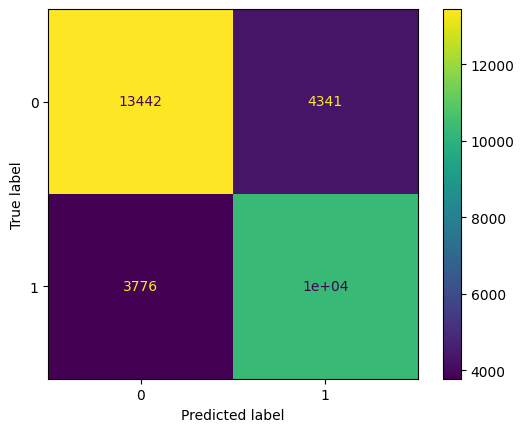

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)

model.fit(X_Train, Y_Train)
y_pred = model.predict(X_Test)

model.score(X_Test, Y_Test)
conf_mat = confusion_matrix(Y_Test, y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

print(classification_report(Y_Test, y_pred, target_names=['non-smoker', 'smoker']))

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(X_Train, Y_Train)
model.score(X_Test, Y_Test)

0.3176904846017532

In [ ]:
gnb.fit(X_Train, Y_Train)
gnb.score(X_Test, Y_Test)

0.7232826824061284

In [ ]:
#Decision Trees:
from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier(n_estimators=100, random_state=2)
Forest.fit(X_Train, Y_Train)
Forest.score(X_Test, Y_Test)


0.7706266482481476

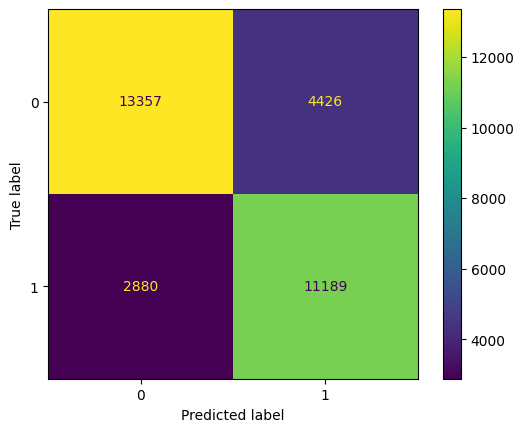

In [ ]:
Forest_Pred = Forest.predict(X_Test)
conf_mat = confusion_matrix(Y_Test,Forest_Pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:
svc.fit(X_Train , Y_Train)
svc.score(X_Test, Y_Test)


0.7644731884967977

In [ ]:
print(classification_report(Y_Test, svc.predict(X_Test), target_names=['non-smoker', 'smoker']))

              precision    recall  f1-score   support

  non-smoker       0.84      0.71      0.77     17783
      smoker       0.69      0.83      0.76     14069

    accuracy                           0.76     31852
   macro avg       0.77      0.77      0.76     31852
weighted avg       0.78      0.76      0.77     31852



In [ ]:
knn.fit(X_Train , Y_Train)
knn.score(X_Test, Y_Test)


0.7237222152455105

Now we want to assess the predictions made by the neural network model.

In [ ]:
Predictions  = np.array(model.predict(X_Test))



In [ ]:
predicted = tf.squeeze(Predictions)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])

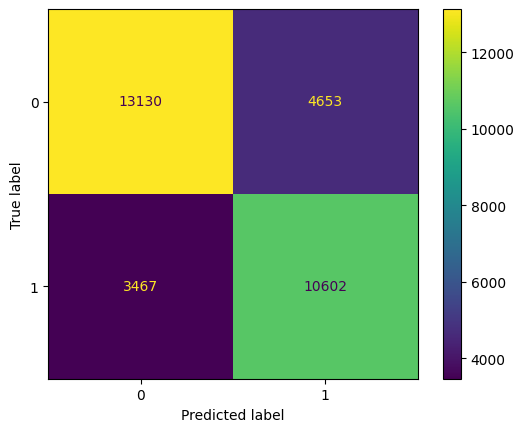

In [ ]:
conf_mat = confusion_matrix(Y_Test, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

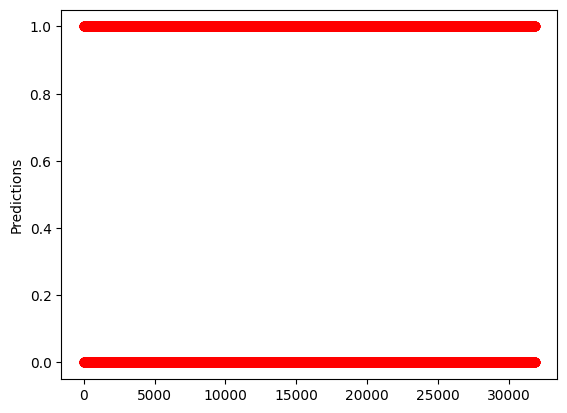

In [ ]:
import matplotlib.pyplot as plt

plt.plot(predicted,'ro')
plt.ylabel('Predictions')
plt.show()

In [ ]:
svc_p = svc.predict(X_Test)

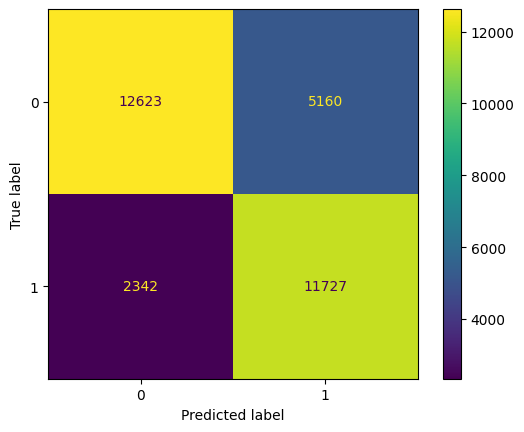

In [ ]:
conf_mat = confusion_matrix(Y_Test, svc_p)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()